# <center>Titanic. Decision tree model</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Input data

In [2]:
train_df = pd.read_csv("datasets/train.csv", index_col="PassengerId")
test_df = pd.read_csv("datasets/test.csv", index_col="PassengerId")

In [3]:
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)
test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [7]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

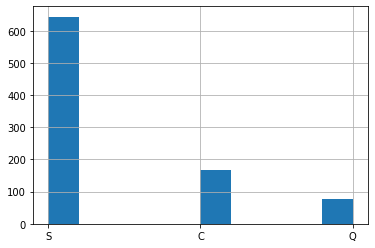

In [8]:
train_df["Embarked"].hist();

In [9]:
train_df["Embarked"].fillna('S', inplace=True)

In [10]:
pd.crosstab(train_df["Embarked"], train_df["Survived"], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009


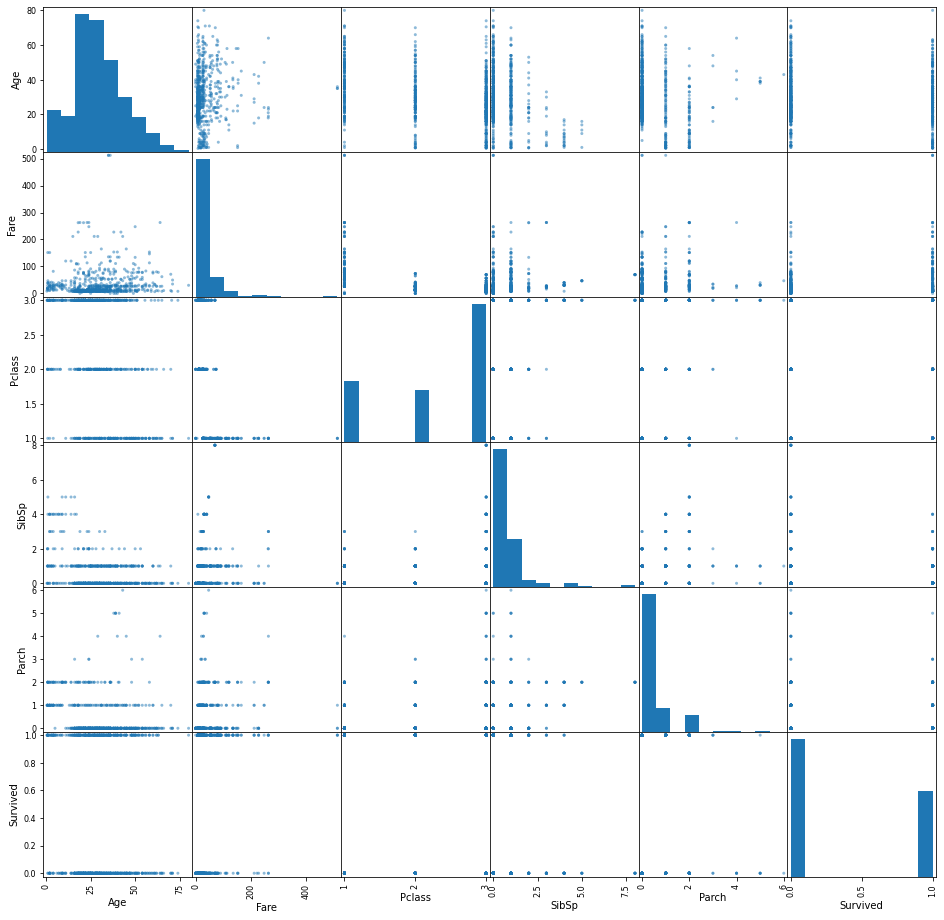

In [11]:
pd.plotting.scatter_matrix(train_df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]],
                          figsize=(16,16));

Categorical features: Survived, Pclass, Sex, SibSp, Parch, Embarked

Numerical features: Age, Fare

**Target - Survived**

In [12]:
pd.crosstab([train_df['Age'] < 30, train_df['Age'] > 60], train_df['Survived'], 
            rownames=['Age < 30', 'Age > 60'], 
            normalize='index')

Survived                  0         1
Age < 30 Age > 60                    
False    False     0.626804  0.373196
         True      0.772727  0.227273
True     False     0.593750  0.406250

In [13]:
train_df.groupby(["Pclass", 'Sex'])[['Age']].mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

MeanAge of died 	- 30.62617924528302
MeanAge of survived 	- 28.343689655172415


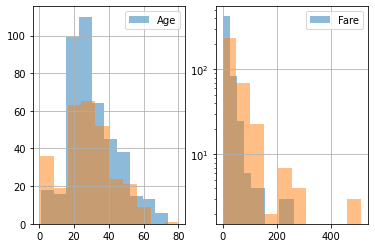

In [14]:
print('MeanAge of died \t-', train_df[train_df['Survived'] == 0]['Age'].mean())
print('MeanAge of survived \t-', train_df[train_df['Survived'] == 1]['Age'].mean())
fig, ax = plt.subplots(1,2)
train_df[train_df['Survived'] == 0]["Age"].hist(alpha=0.5, ax=ax[0], legend=True);
train_df[train_df['Survived'] == 1]["Age"].hist(alpha=0.5, ax=ax[0]);
train_df[train_df['Survived'] == 0]["Fare"].hist(alpha=0.5, ax=ax[1], legend=True);
train_df[train_df['Survived'] == 1]["Fare"].hist(alpha=0.5, ax=ax[1]);
ax[1].set_yscale('log')

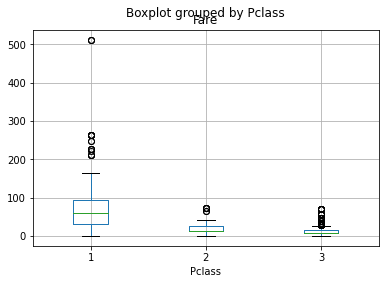

In [15]:
train_df.boxplot("Fare", "Pclass");

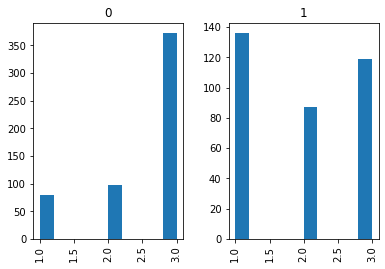

In [16]:
train_df.hist("Pclass", "Survived");

In [17]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [18]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


## Training model

In [19]:
target = train_df["Survived"]
features= train_df.drop(['Survived'],axis=1)

In [20]:
numeric_features=["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Pclass", "Sex", "Embarked"]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

features_pipeline = ColumnTransformer([
        ("num", num_pipeline, numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])

train_prepared = features_pipeline.fit_transform(train_df)

In [22]:
# ohencoder = OneHotEncoder()
# sdscaler = StandardScaler()

In [23]:
train_prepared.shape

(891, 12)

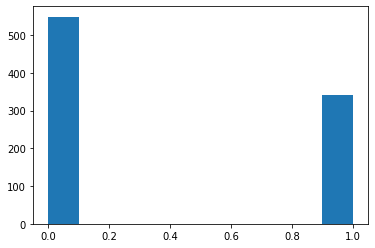

In [24]:
plt.hist(target);

#### Disbalance

In [25]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([('preprocessing',features_pipeline),('balancing',RandomOverSampler()),('estimator',DecisionTreeClassifier())])

In [26]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('balancing', RandomOverSampler()),
                ('estimator', DecisionTreeClassifier())])

In [27]:
from sklearn.model_selection import StratifiedKFold

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'estimator__criterion':['gini','entropy'],
    'estimator__max_depth':[2,3,4,5,6,None],
    'estimator__min_samples_split':[2,3,4,5,6,7,8]
}
grid_search_estimator = GridSearchCV(pipeline, param_grid=params, cv=stratified_10_fold_cv, scoring ='accuracy', refit=True, n_jobs=1)
grid_search_estimator.fit(features,target)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'SibSp',
                                                                          'Parch']),
              

In [29]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,NaN,1,2,23.4500,S


In [30]:
from sklearn.metrics import classification_report, \
                            accuracy_score, \
                            confusion_matrix, \
                            precision_score, \
                            recall_score, \
                            roc_auc_score
from sklearn.model_selection import cross_val_predict

prediction = cross_val_predict(grid_search_estimator.best_estimator_, features, target, cv=stratified_10_fold_cv)

In [31]:
grid_search_estimator.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('balancing', RandomOverSampler()),
                ('estimator',
                 DecisionTreeClassifier(max_depth=3, min_samples_split=5))])

In [32]:
accuracy_score(target,prediction)

0.8159371492704826

In [33]:
confusion_matrix(target,prediction)

array([[478,  71],
       [ 93, 249]], dtype=int64)

In [34]:
precision_score(target,prediction)

0.778125

In [35]:
recall_score(target,prediction)

0.7280701754385965

In [36]:
roc_auc_score(target,prediction)

0.7993720640398811

In [37]:
estimation = grid_search_estimator.best_estimator_.predict(test_df)

In [38]:
estimation

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
df_real=pd.read_csv('datasets/gender_submission.csv', sep=',')
df_real["Survived"].values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
(estimation == df_real["Survived"].values).sum()

402

In [41]:
df_real["Survived"].count()

418

In [42]:
(estimation == df_real["Survived"].values).sum() / df_real["Survived"].count()

0.9617224880382775